In [4]:

#This adata is trained,only to demonstratrate function

import pandas as pd
import scanpy as sc
import numpy as np
from anndata import AnnData
import CytoBridge
adata = sc.read_h5ad('/home/sjt/workspace2/CytoBridge_test-main_crufm/results/weinreb_unbalance/adata.h5ad')
adata.obs['time_point_processed']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
49297    2.0
49298    2.0
49299    2.0
49300    2.0
49301    2.0
Name: time_point_processed, Length: 49302, dtype: float64

In [24]:
adata.obsm['X_latent']

array([[-1.21745586, -1.87692153, -1.20554388, ..., -0.14318822,
         0.78080755, -0.62478417],
       [-5.24358034, -1.76112878, -1.72936702, ..., -0.2081857 ,
         0.43517146,  0.26399422],
       [-5.75244713, -1.4193188 , -2.10216308, ..., -0.16011941,
         0.13154209,  0.41367608],
       ...,
       [ 0.2503593 , -2.77228689,  1.35244071, ..., -0.3066386 ,
        -0.56767762,  0.62916499],
       [12.65442562,  0.7583034 , -6.56914997, ...,  0.65489227,
        -0.863675  , -0.08910855],
       [-5.76521158, -1.73755229, -1.4992187 , ..., -0.40632159,
        -0.20304221, -0.80190194]])

In [25]:
adata

AnnData object with n_obs × n_vars = 49302 × 50
    obs: 'samples', 'time_point_processed'
    uns: 'all_model'
    obsm: 'X_latent', 'growth_rate', 'velocity_latent'

Reconstructing model...
Model loaded successfully.


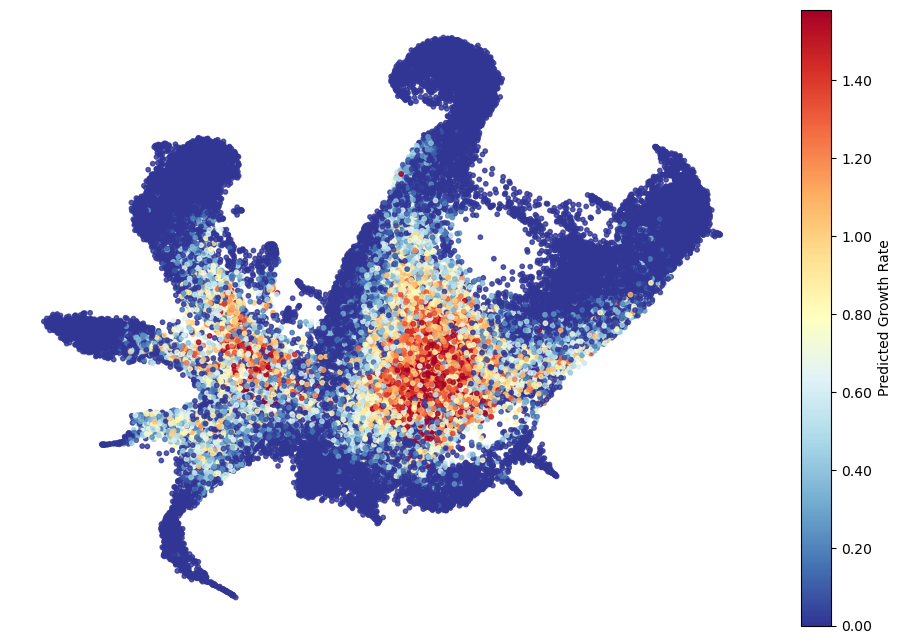

In [4]:
if 'growth_rate' in adata.obsm:
    CytoBridge.tl.analysis.compute_growth(adata, device='cuda')
    CytoBridge.pl.plot_growth(adata,dim_reduction='umap',save_path='/home/sjt/workspace2/CytoBridge_test-main_crufm/figures/weinreb_unbalance')

Reconstructing model...
Model loaded successfully.
computing velocity graph (using 16/64 cores)


  0%|          | 0/49302 [00:00<?, ?cells/s]

    finished (0:00:20) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:07) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/emt_unbalance/scvelo_Velocity_Stream_Plot.svg


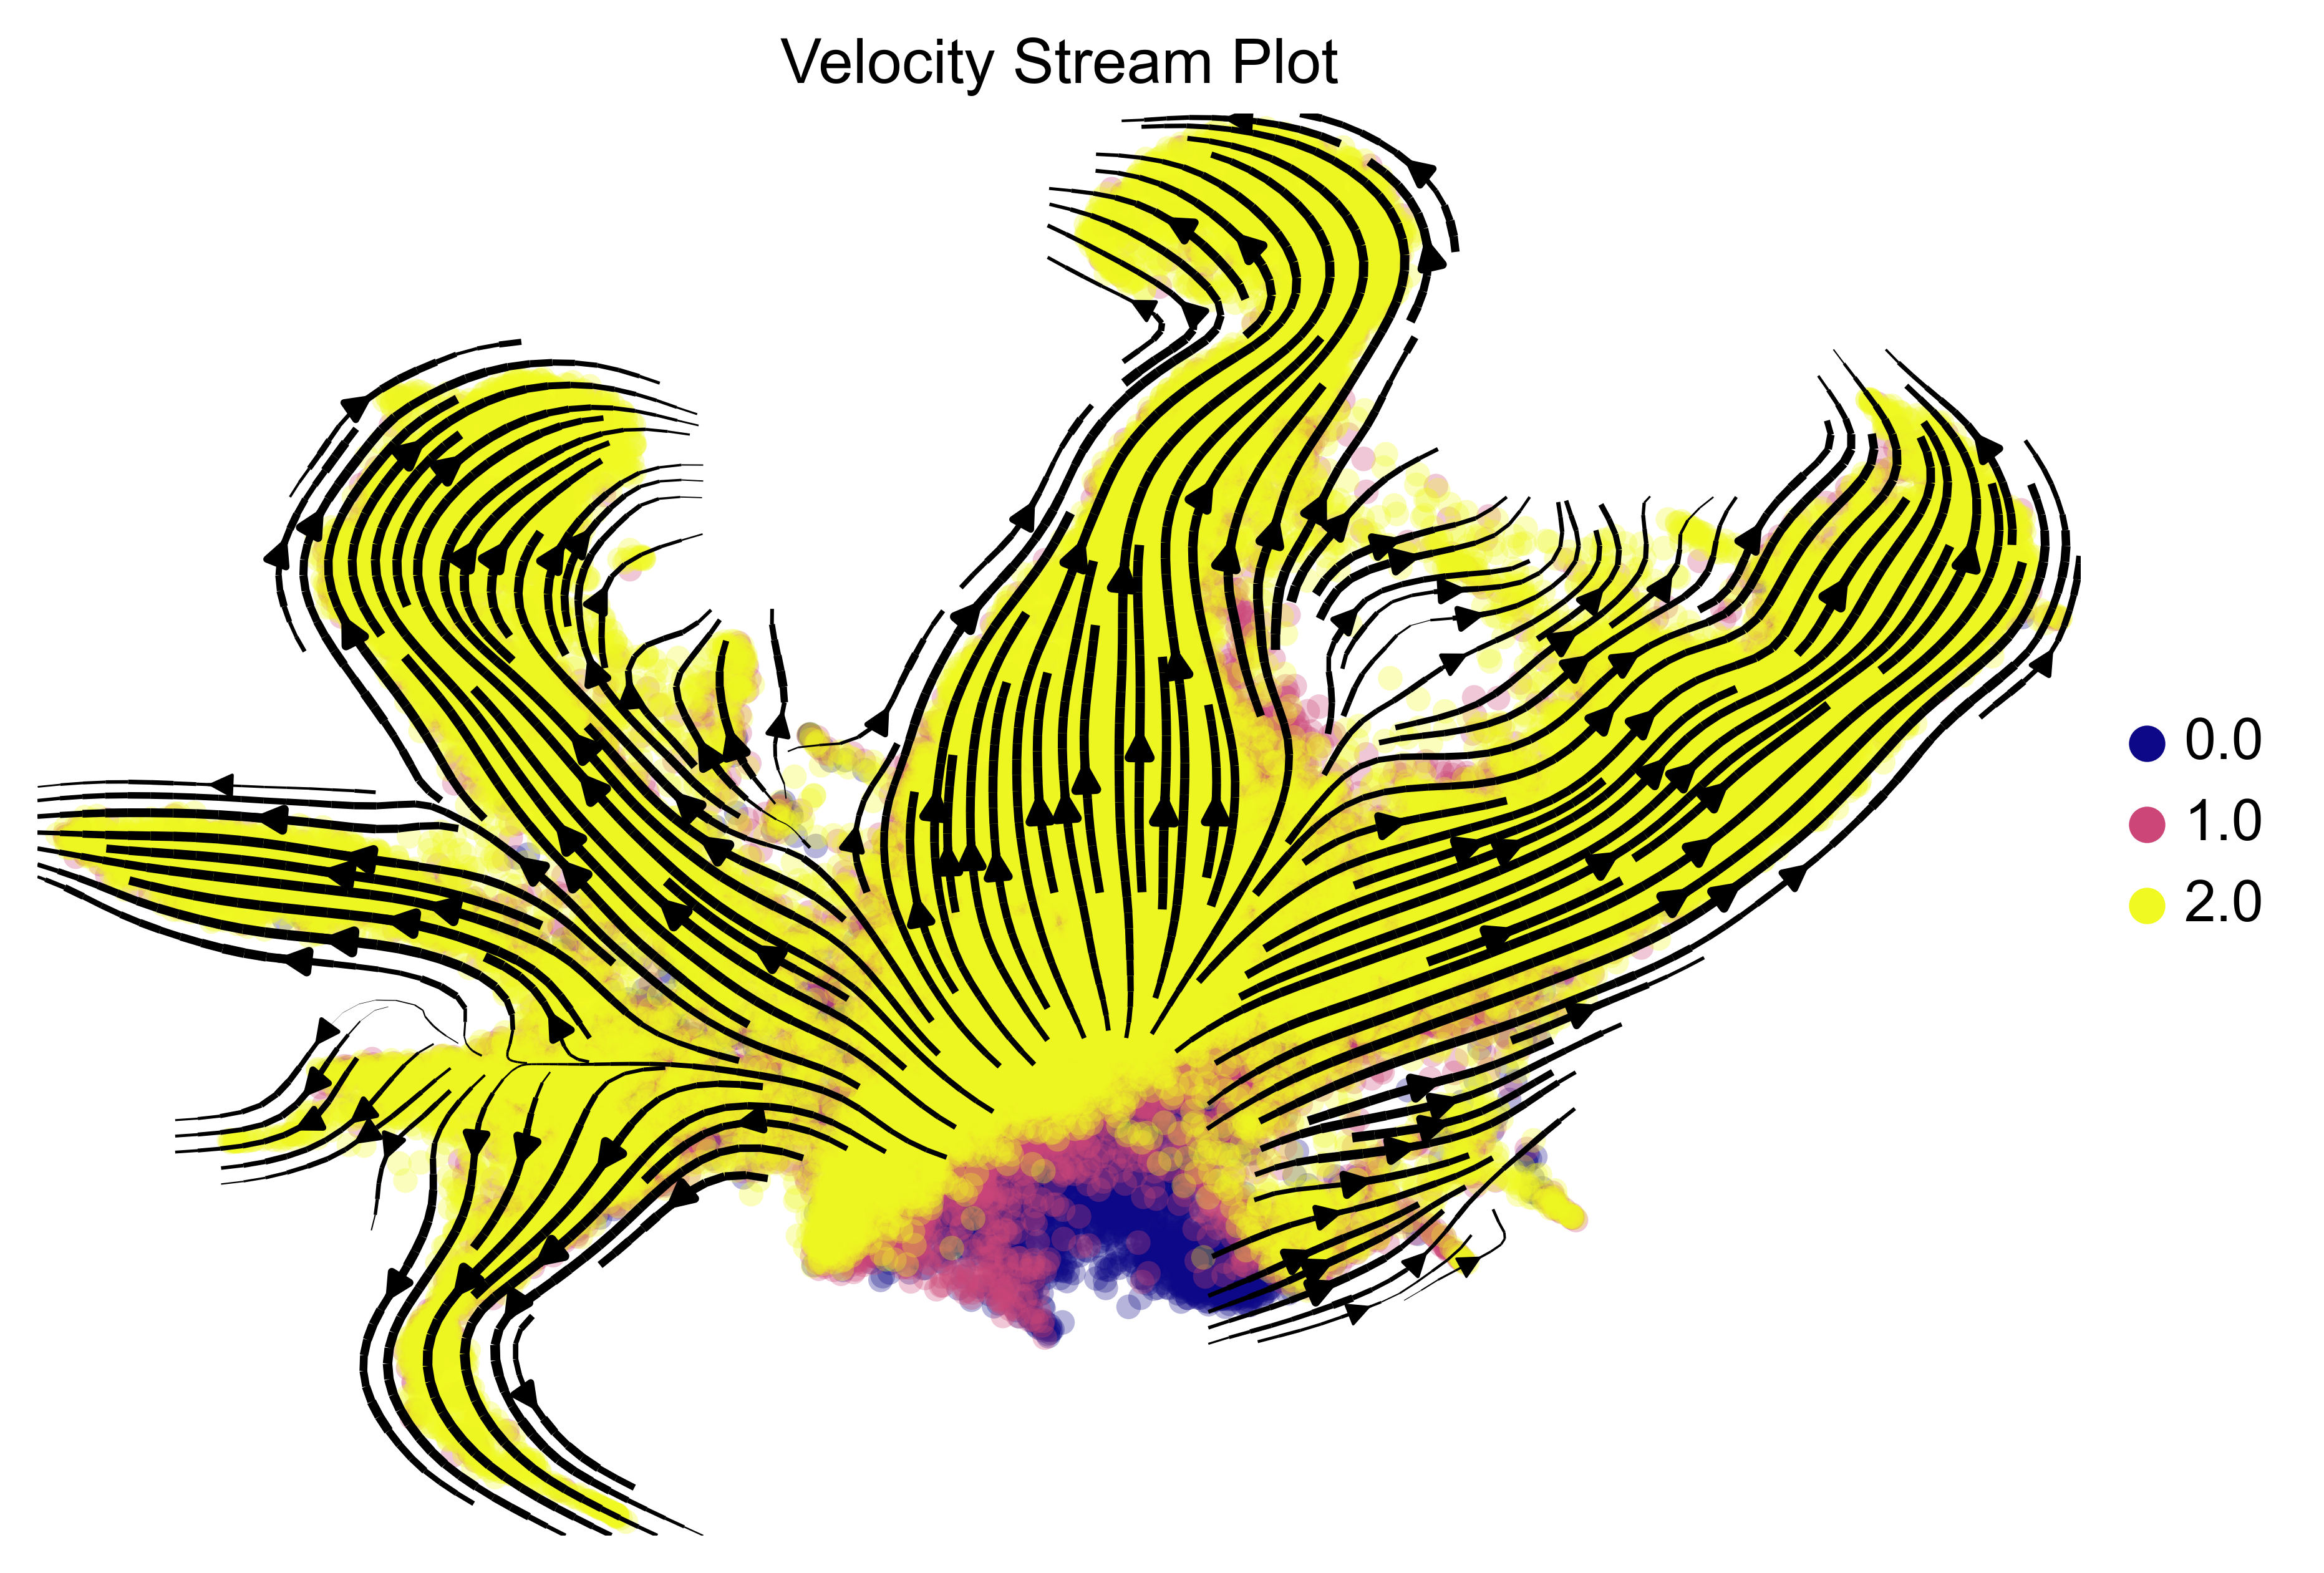

Velocity stream plot saved to: /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/emt_unbalance/Velocity_Stream_Plot.svg


In [6]:
if 'velocity_latent' in adata.obsm:
    CytoBridge.tl.analysis.compute_velocity(adata, device='cuda')
    CytoBridge.pl.plot_velocity_stream(adata, save_dir='/home/sjt/workspace2/CytoBridge_test-main_crufm/figures/weinreb_unbalance', dim_reduction='umap', device='cuda')


In [5]:
CytoBridge.pl.plot_ode_trajectories(adata=adata, save_dir='/home/sjt/workspace2/CytoBridge_test-main_crufm/figures/weinreb_unbalance',n_trajectories=20,dim_reduction='umap',device="cuda")


Reconstructing model...
Model loaded successfully.
[generate_ode_trajectories] trajectories saved to /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/emt_unbalance/ode_results
[Trajectory selection] Using the first 20 trajectories.
[plot_ode] Saved to -> /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/emt_unbalance/ode_results/ode_trajectories.png
[ode_trajectories] Finished -> /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/emt_unbalance/ode_results/ode_trajectories.png
